# **Living Room Data Analysis of EcoHomeAI**
> **Author:** Akshara Shukla,  Mark  
> **Class:** AI43, 
> **Project:** Mega Project Group 05- Eco Village Boekel

This file contains the Exploratory Data Analysis of the sensor data provided to us from the client before and after the predictions have been made. Various steps have been practised to understand the valuable insights and vital patterns which further help in drawing conclusions from the sensor data in improving the Air Quality Index in EcoVillage situated in Boekel, Netherlands. The goal of this mega project is to predict the value of Air Quality Index for the next 1hour and 24 hours when considering the last 24 hours by using RNN model LSTM(Long Short Term Memory) algorithm for time series prediction.



# Exploratory Data Analysis

## Importing the required libraries 
To initiate our data analysis, we first import the necessary libraries required for conducting our data manipulation.

In [ ]:
#Importing the necessary and required libraries
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import io
import plotly 
import plotly.express as px
import os
import datetime
import math
import IPython
import IPython.display

#Printing the version of the libraries
print("Pandas Version: ", pd.__version__)
print("Numpy Version: ", np.__version__)
print("Matplotlib Version ", mpl.__version__)
print("Plotly Version: ", plotly.__version__)


from google.colab import drive
drive.mount('/content/drive')

Pandas Version:  1.1.5
Numpy Version:  1.19.5
Matplotlib Version  3.2.2
Plotly Version:  4.4.1
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing and Setting our Dataset


In this file, we will be analysing purely the *Living Room* sensor data for months <b>January, February and March </b>. So, the analysis for the other rooms would be followed in the same step, for gaining feedback we're using this notebook. 

Our data is stored in a csv file in a google drive folder. We decided o store the data on a cloud service for easier reach and feasibility. Therefore, we will be initially importing them from the google drive storage and lastly merging them all into one final dataset <b>result</b>.

In [ ]:
#Importing the first january dataset naming it to df
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F556 WK_MinutebyMinuteData January Livingroom 1p.csv',parse_dates=True)

In [ ]:
#Importing the next january datasets assigning it to jan2p and jan3p
jan2p = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/b790_MinutebyMinuteData Livingroom 2p.csv')
jan3p = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WK2345_MinutebyMinuteData January Livingroom 3p.csv')

In [ ]:
#Importing the february and march datasets assigning it to febdf, marchdf
febdf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SLKLuc_MinutebyMinuteData Feb 2021.csv')
marchdf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SLKLuc_MinutebyMinuteData Mar 2021.csv')

In [ ]:
#Merging all the january datasets and assining it to variable jandf with axis = 0 for data to be added in row wise manner.
jandf = pd.concat([df,jan2p,jan3p],axis=0)

After having merged all january datasets into <b>jandf</b>, we will be concatinating all the datasets into <b>result</b> our final dataset which will be used for analysis.

In [ ]:
#Concatinating all the living room datasets into result
result = pd.concat([jandf,febdf,marchdf], axis = 0)

#Viewing the first five rows of the dataset
result.head()

,Date and Time,Temperature,Relative Humidity,PM2.5,TVOC,CO2,CO,Air Pressure,Ozone,NO2,Virus Index
0,2021-01-22 11:33,17.8,61.2,4,0,1167,0,992.7,8.0,19.4,5
1,2021-01-22 11:34,17.9,60.6,2,0,1159,0,992.6,8.0,19.4,5
2,2021-01-22 11:35,17.9,61.0,2,0,1160,0,992.6,8.0,19.4,5
3,2021-01-22 11:36,17.9,60.5,3,0,1161,0,992.6,8.0,19.4,5
4,2021-01-22 11:37,18.0,59.7,2,0,1166,0,992.6,8.0,19.4,4


Data Description:
In our dataset <b>result</b>, the following variables are present, lets understand the definition behind them.

1. *Date and Time*: Every day in January to March with 24 hours time stored minute by minute.
2. *Temperature*: The indoor temperature recorded in Celcius.
3. *Relative Humidity*: The amount of water vapour present in the air relative to the maximum water vapour that it can hold. In most cases, relative humidity unit is expressed in percentage.
4. *PM2.5*: The atmospheric particulate matter (PM) that have a diameter of less than 2.5 micrometers. Measured in micro grams/cubic meter.
5. *TVOC*: The term TVOC refers to the total concentration of multiple airborne VOCs (Volatile Organic Compounds) present simultaneously in the air. Measured in parts per million (ppm) 
6. *CO2*: This is measured in parts per million (ppm), which is numerically equivalent to micromoles of CO2 per mole of air. 
7. *CO*: Carbon monoxide is a colorless, odorless, tasteless, flammable gas that is slightly less dense than air. Its measured in ppm as well.
8. *Air Pressure*: The amount of pressure present in the air.
9. *Ozone* : The presence of Ozone in the eco village. Amount < 5ppm being optimal.
10. *NO2* : Amount of Nitrogen Oxide, dangerous levels have straight affect to the human respiratory systems.
11. *Virus Index*: The virus index ranging from 1 - 10 in the ecovillage.





### Extracting Time Series values from *Date and Time* Column
Because we are solving a time series forecasting problem, the column *Date and Time* play the main role. Therefore, we will be extracting columns *Hour*,*Minutes*,*Day*,*Year*,*Weekday*,*Weekdayno*, and *month* for better analysis of our target value AQI over time.

In [ ]:
result['Date and Time'] = pd.to_datetime(result['Date and Time'], format= '%Y-%m-%d %H:%M:%S')
result["Hour"] = [x.hour for x in result["Date and Time"]]
#result["Minutes"] = [x.minute for x in result["Date and Time"]]
#result["Day"] = [x.day for x in result["Date and Time"]]
#result['year'] = pd.to_datetime(result['Date and Time']).dt.year

result['Weekday'] = result['Date and Time'].dt.day_name()
result['Weekdayno'] = result['Date and Time'].dt.dayofweek
result['month'] = pd.to_datetime(result['Date and Time']).dt.month

#result['week_in_month'] = pd.to_numeric(result["Day"]/7)
#result['week_in_month'] = result['week_in_month'].apply(lambda x: math.ceil(x))

result.head()

,Date and Time,Temperature,Relative Humidity,PM2.5,TVOC,CO2,CO,Air Pressure,Ozone,NO2,Virus Index,Hour,Weekday,Weekdayno,month
0,2021-01-22 11:33:00,17.8,61.2,4,0,1167,0,992.7,8.0,19.4,5,11,Friday,4,1
1,2021-01-22 11:34:00,17.9,60.6,2,0,1159,0,992.6,8.0,19.4,5,11,Friday,4,1
2,2021-01-22 11:35:00,17.9,61.0,2,0,1160,0,992.6,8.0,19.4,5,11,Friday,4,1
3,2021-01-22 11:36:00,17.9,60.5,3,0,1161,0,992.6,8.0,19.4,5,11,Friday,4,1
4,2021-01-22 11:37:00,18.0,59.7,2,0,1166,0,992.6,8.0,19.4,4,11,Friday,4,1


### Analysing *Result* Dataset
After having successfully formed our final living room dataframe *result*, we will be analysing it's numerical values. 

In [ ]:
print(f"The shape of the df is {result.shape}\n Meaning it has {result.shape[0]} rows and {result.shape[1]} unique columns.")

The shape of the df is (156264, 15)
 Meaning it has 156264 rows and 15 unique columns.


Next, to see what datatypes our different columns are, we use .info() to investigate. From which we see, we are having 5 float, 7 integer, 1 object and 1 datetime column with no null values present which indicates our data is complete .

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156264 entries, 0 to 44295
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date and Time      156264 non-null  datetime64[ns]
 1   Temperature        156264 non-null  float64       
 2   Relative Humidity  156264 non-null  float64       
 3   PM2.5              156264 non-null  int64         
 4   TVOC               156264 non-null  int64         
 5   CO2                156264 non-null  int64         
 6   CO                 156264 non-null  int64         
 7   Air Pressure       156264 non-null  float64       
 8   Ozone              156264 non-null  float64       
 9   NO2                156264 non-null  float64       
 10  Virus Index        156264 non-null  int64         
 11  Hour               156264 non-null  int64         
 12  Weekday            156264 non-null  object        
 13  Weekdayno          156264 non-null  int64    

Further understanding the statistics of our numerical variables. From below, we can see the *CO* column in entirely 0 meaning in our Eco Village, there is no source of burning fossil fossil due to it being environmentally sustainable. In addition, we can also see the range of the key air parameters. 

In [ ]:
result.describe()

,Temperature,Relative Humidity,PM2.5,TVOC,CO2,CO,Air Pressure,Ozone,NO2,Virus Index,Hour,Weekdayno,month
count,156264.000000,156264.000000,156264.000000,156264.000000,156264.000000,156264.0,156264.000000,156264.000000,156264.000000,156264.000000,156264.000000,156264.000000,156264.000000
mean,20.529043,40.340911,9.430861,121.661253,746.539900,0.0,1012.521512,6.518183,23.634513,3.890371,11.590296,3.089061,1.804856
std,2.405196,7.975582,14.891599,192.767639,225.499366,0.0,12.642098,3.022203,35.333203,1.769242,6.917582,1.988566,0.850885
min,7.200000,15.400000,1.000000,0.000000,400.000000,0.0,980.800000,1.700000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,18.800000,35.200000,2.000000,14.000000,564.000000,0.0,1001.600000,3.500000,0.500000,3.000000,6.000000,1.000000,1.000000
50%,20.200000,40.200000,4.000000,53.000000,715.000000,0.0,1013.500000,5.900000,0.900000,4.000000,12.000000,3.000000,2.000000
75%,21.900000,44.800000,11.000000,144.000000,895.000000,0.0,1022.700000,9.400000,48.900000,5.000000,18.000000,5.000000,3.000000
max,31.000000,77.300000,200.000000,1200.000000,2499.000000,0.0,1040.200000,22.400000,277.600000,10.000000,23.000000,6.000000,3.000000


In [ ]:
#checking how many null values are in each column
print(result.isnull().sum())
print("No Null values present.")

Date and Time        0
Temperature          0
Relative Humidity    0
PM2.5                0
TVOC                 0
CO2                  0
CO                   0
Air Pressure         0
Ozone                0
NO2                  0
Virus Index          0
Hour                 0
Weekday              0
Weekdayno            0
month                0
dtype: int64
No Null values present.


In [ ]:
duplicate = result.duplicated()
print(f'There are {duplicate.sum()} duplicate values.')

There are 0 duplicate values.


After having understood the statistical and concluding our dataset has complete values with no null or duplicate values, lets investigate how the variables correlate with each other and with the substitute of AQI : Virus Index for now by constructing a correlation map.

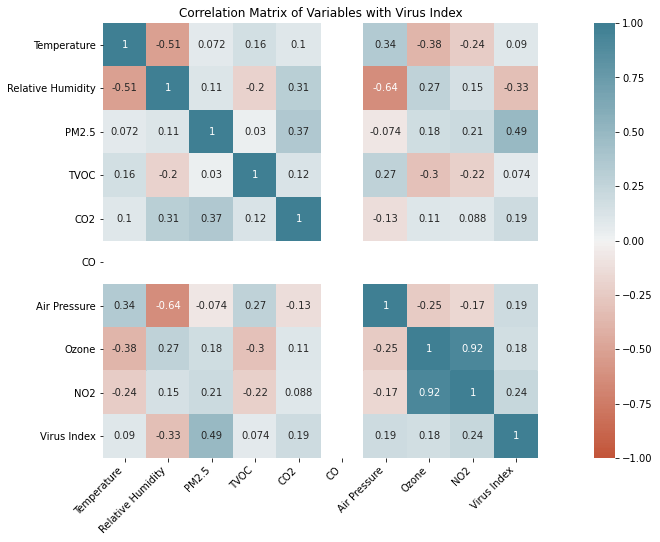

In [ ]:
#Correlation map
df_corr = result.corr()
df_corr = df_corr.drop(['Weekdayno','Hour','month'],axis = 1)
df_corr = df_corr.drop(['Weekdayno','Hour','month'],axis = 0)
plt.figure(figsize=(20,8))
ax = sns.heatmap( df_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title("Correlation Matrix of Variables with Virus Index");

From the correlation matrix above, we can see PM2.5 correlates strongly with the Virus Index (positively) while the top three positive correlated values are:
1. PM2.5 = 0.49
2. NO2 = 0.24
3. CO2/Air Pressure = 0.19
Meaning, as the value of these variables increases the index of Virus Index increases and vice versa.

From the correlation matrix above, we can see Relative Humidity correlates strongly (negatively).
1. Relative Humidity = -0.33
Meaning as the the value of Relative Humidity increases, the Virus Index decreases.


## Subsetting Virus Index According to uHoo sensors
With the virus index values that are present in the result dataframe, we will be categorizing them into categories which correspond to the *uHoo Sensors*, which are the sensors being used to record the values present in our dataset. The snippet of the categories are present as below:

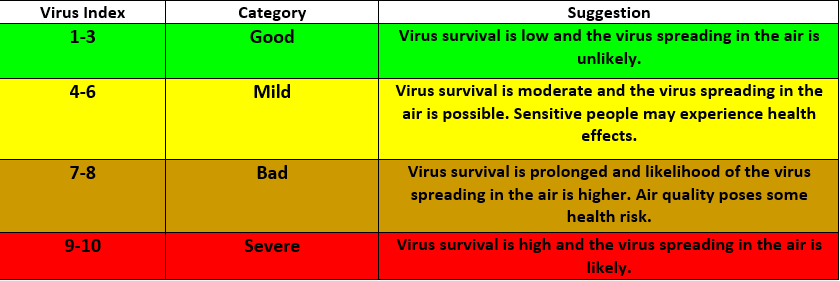

Keeping the above table as a reference, creating a cols list, which will be storing all the categories of Virus Index by using conditional statements if and else statements and storing them in *VirusIndexCat* new column in our dataset.

In [ ]:
#Instantiating the cols list
cols = []

#Applying conditions 
for ind, row in result.iterrows():
  if  row['Virus Index'] <= 3 :
    cols.append("Good")
  elif row['Virus Index'] <= 6:
    cols.append("Mild")
  elif row['Virus Index'] <= 8:
    cols.append("Bad")
  else:
    cols.append("Severe")

#Storing the virus index categories to the column 'VirusIndexCat'
result['VirusIndexCat'] = cols
result.head()

,Date and Time,Temperature,Relative Humidity,PM2.5,TVOC,CO2,CO,Air Pressure,Ozone,NO2,Virus Index,Hour,Weekday,Weekdayno,month,VirusIndexCat
0,2021-01-22 11:33:00,17.8,61.2,4,0,1167,0,992.7,8.0,19.4,5,11,Friday,4,1,Mild
1,2021-01-22 11:34:00,17.9,60.6,2,0,1159,0,992.6,8.0,19.4,5,11,Friday,4,1,Mild
2,2021-01-22 11:35:00,17.9,61.0,2,0,1160,0,992.6,8.0,19.4,5,11,Friday,4,1,Mild
3,2021-01-22 11:36:00,17.9,60.5,3,0,1161,0,992.6,8.0,19.4,5,11,Friday,4,1,Mild
4,2021-01-22 11:37:00,18.0,59.7,2,0,1166,0,992.6,8.0,19.4,4,11,Friday,4,1,Mild


### Analysing Virus Index
After having the *VirusIndexCat* formed, lets investigate how each category (Bad, Good, Mild and Severe) varies with their count over the three months: Janurary, Februrary and March respectively by plotting bar graphs of each.

In [ ]:
#Grouping the values of VirusIndexCat with the month
vi = result.groupby(['month', 'VirusIndexCat']).size().reset_index()
vi['Count'] = vi[0]
vi.pop(0)
vi

,month,VirusIndexCat,Count
0,1,Bad,6389
1,1,Good,35575
2,1,Mild,31501
3,1,Severe,1325
4,2,Bad,2927
5,2,Good,17616
6,2,Mild,16128
7,2,Severe,507
8,3,Bad,1835
9,3,Good,19790


For better readability, we will be plotting the graphs of virus index count for each sub category for each three months as below by manually adding the values of 

[]

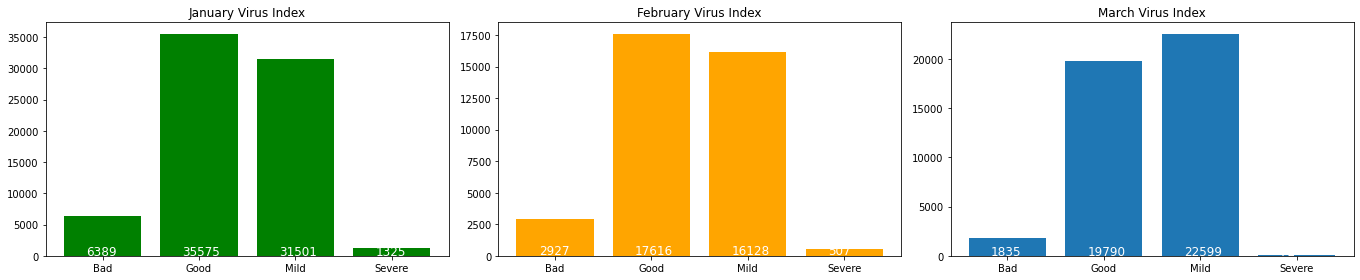

In [ ]:
#January Virus Index Category Values
jan = ('Bad','Good','Mild','Severe')
virusindexcat = (6389,35575,31501,1325)

#February Virus Index Category Values
feb = ('Bad','Good','Mild','Severe')
virusfeb = (2927,17616,16128,507)

#March Virus Index Category Values
mar = ('Bad','Good','Mild','Severe')
virusmar = (1835,19790,22599,72)

#Adding the corresponding value of each virus index count on the bottom of each bar for each plots plotted of three axses.
fig, ((ax1,ax2,ax3)) = plt.subplots(1,3, figsize = (19,4))

#January bar graph 
ax1.title.set_text("January Virus Index")
ax1.bar(jan,virusindexcat, width=0.8, color = 'green')
for i, v in enumerate(virusindexcat):
    ax1.text(i-.17, 
              v/virusindexcat[i]+100, 
              virusindexcat[i], 
              fontsize=12, 
              color='white')

#February bar graph 
ax2.title.set_text("February Virus Index")
ax2.bar(feb,virusfeb, color = 'orange')
for i, v in enumerate(virusfeb):
    ax2.text(i-.17, 
              v/virusfeb[i]+100, 
              virusfeb[i], 
              fontsize=12, 
              color='white')

#March bar graph
ax3.title.set_text("March Virus Index")
ax3.bar(mar,virusmar)
for i, v in enumerate(virusmar):
    ax3.text(i-.17, 
              v/virusmar[i]+100, 
              virusmar[i], 
              fontsize=12, 
              color='white')
plt.tight_layout()
plt.plot()

From the above plots, we can see the distribution of Virus Index Values in each month. Some of the key insights we can depend on are that the Virus Index stayed at a <b>Good</b> category for the first two months but as the month of March approached, the number of virus in the eco village increased and the air quality dropped down to <b>Mild</b>.

Next, we will be forming single gauges for each of the virus index count and category for each month with their amount of difference from the Severe cateogory for visualizations in our web application by using plotly graphs.

In [ ]:
#Importing plotly graphs library for forming interactive plots
import plotly.graph_objects as go

#January Indicator gauge 
fig = go.Figure(go.Indicator(
    mode = "number+gauge+delta",
    gauge = {'shape': "bullet"},
    delta = {'reference': 1345},  #value of severe sub category of virus index for january
    value = 35575,               #value taken from the good virus index category count for january
    domain = {'x': [0.1, 0.9], 'y': [0.1, 0.9]},
    title = {'text': "Good"}))

#Updating the layout so as to fit the plot in a readable and clear manner.
fig.update_layout(
    paper_bgcolor="lightgray",
    height=300,  # Added parameter
    width= 900,
    title = "January Virus Index ")

fig.show()

In [ ]:
#February Indicator gauge 
fig = go.Figure(go.Indicator(
    mode = "number+gauge+delta",
    gauge = {'shape': "bullet"},
    delta = {'reference': 507}, #severe virus index count for february
    value = 17616, #good virus index count for february
    domain = {'x': [0.1, 0.9], 'y': [0.1, 0.9]},
    title = {'text': "Good"}))


fig.update_layout(
    paper_bgcolor="lightgray",
    height=300,  # Added parameter
    width= 900,
    title = "February Virus Index ")

fig.show()

In [ ]:
#March Indicator gauge 
fig = go.Figure(go.Indicator(
    mode = "number+gauge+delta",
    gauge = {'shape': "bullet",
            'bar': {'color': "red"}},
    delta = {'reference': 72},  #severe virus index count for march
    value = 22599, #good virus index count for march
    domain = {'x': [0.1, 0.9], 'y': [0.1, 0.9]},
    title = {'text': "Mild"}))


fig.update_layout(
    paper_bgcolor="lightgray",
    height=300,  # Added parameter
    width= 900,
    title = "March Virus Index ",
    plot_bgcolor='rgba(1,0,0,0)' #setting color of the gauge to red
    )

fig.show()

Next, we will be forming the interactive plot of bubble charts again from the plotly library for illustrating the different subcategory of Virus Index in our Living Room of Eco Village in our web application EcoHomeAI.

In [ ]:
#Creating a sub dataframe called totalvi, which stores the value count of each category
totalvi = (result.groupby(['VirusIndexCat'])
 .size()
 .reset_index(name="virus_count"))
totalvi

,VirusIndexCat,virus_count
0,Bad,11151
1,Good,72981
2,Mild,70228
3,Severe,1904


In [ ]:
#The plotly. express module (usually imported as px ) contains functions that can create entire figures at once.
import plotly.express as px

#Forming a scatterplot initially with the count and specifying the size of the bubble, and its color.
fig = px.scatter(totalvi, x="VirusIndexCat", y="virus_count",
	         size="virus_count", color="virus_count",
                  size_max=60)

#Updating the layout for making it eye friendly, with specifying it's height and width and setting the title
fig.update_layout(
    #paper_bgcolor="lightwhite",
    height=300,  # Added parameter
    width= 900,
    title = "Overall Virus Index ",
    plot_bgcolor='ivory'
    )

fig.show()

From the above bubble chart, we can infer the spread of virus index has been lying mostly in the <b>Good and Mild</b> sub categories. This means there is definetely room for improvement in the air quality by giving them additional sustainable suggestions. There were some times when the spread of virus was extremely high which could be due to any harmful or non-environmental friendly activity such as burning of some material due to which we also have <b>Severe</b> category present. 

## Analysing Weather Parameters
So far we have analysed the numerical variables, their correlation values and virus index, now lets investigate how the important air parameters ( PM2.5, TVOC, CO, Ozone and NO2) vary over time.

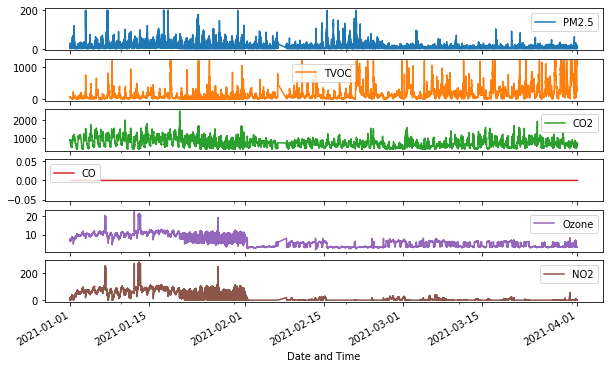

In [ ]:
#Setting the figsize of the entire plot.
mpl.rcParams['figure.figsize'] = (10, 6)

#Specifying the columsns from the result column we want to see the variation
plot_cols = ['PM2.5','TVOC',	'CO2',	'CO','Ozone','NO2']
plot_features = result[plot_cols]

#Setting the index as the date and time as we want to understand the relationship periodically
plot_features.index = result['Date and Time']
_ = plot_features.plot(subplots=True)

From the above seasonal graph of our important air parameters over each day over a period of first three months, we can state the value of CO (Carbon Monoxide) stays null telling us there was no burning of fossil fuels. But the most trends were definitely experienced by PM2.5, TVOC, CO2 which were somewhat similar. Its interesting to notice here that, the Ozone and NO2 experience somewhat similar trend, with increasing until February but immediately strolling down saying the levels of Ozone and NO2 reduced which could be due to coming of summer season.

In [ ]:
#Importing calmap library which is used for forming Calendar heatmaps into our google collab notebook.
!pip install calmap
import calmap

For forming the calendar heatmap, it requires a flattened array therefore using .ravel() pandas function, which is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array.

In [ ]:
#Storing the PM2.5 and Date and Time values into the events variable. 
events = pd.Series(result['PM2.5'].ravel(), index = result["Date and Time"].ravel())

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


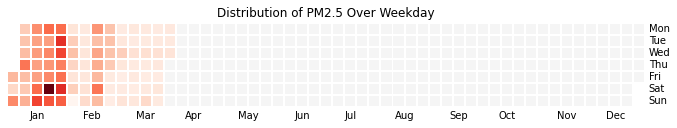

In [ ]:
#Plotting the calmap with setting the values of data and figsize. (AQI)
fig, ax = calmap.calendarplot(data = events, fig_kws={"figsize":(10,4)})
calmap.yearplot(events)
plt.title("Distribution of PM2.5 Over Weekday");

Nextly, lets understand how the data points of <b>Temperature, Relative Humidity and Air Pressure</b> change with date and time by plotting their respective line graphs more into detail as shown below.

[]

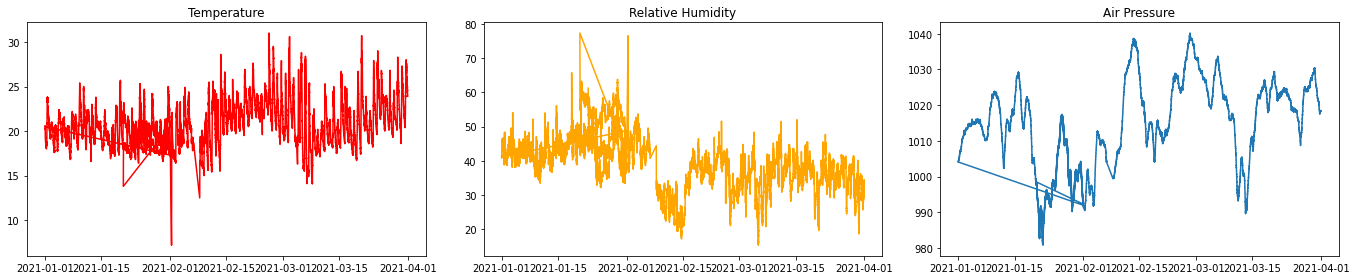

In [ ]:
fig, ((ax1,ax2,ax3)) = plt.subplots(1,3, figsize = (19,4))
ax1.title.set_text("Temperature")
ax1.plot(result["Date and Time"],result["Temperature"],color = 'red')

ax2.title.set_text("Relative Humidity")
ax2.plot(result["Date and Time"],result["Relative Humidity"],color = 'orange')

ax3.title.set_text("Air Pressure")
ax3.plot(result["Date and Time"],result["Air Pressure"])

plt.tight_layout()
plt.plot()

Some instances we can conclude from above graphs are: 
1. The temperature in our eco village situated in Boekel stayed rather in the **same range of 15 - 30 degrees** throughout the months. There was a sudden drop in temperature in the first week of February which can be due to the unexpected snow experienced in the Netherlands in current year. 
2. The Relative Humidity can be described by dividing it's **values into two parts**, the left part having high humidity while the other part having lower humidity which can be due to the virus particles present in the air more mildly in the month of March.
3. An increase in temperature leads to a decrease in pressure. With the average Air Pressure value being 1,013.25 mbar pascals indoors, the distribution of Air Pressure values are appropriate.

For visualization purpose, we will be plotting the min, max and average values of Temperature in three months to understand how Temperature fluctuated over time. This is to understand what was the temperature in the eco village. 

In [ ]:
#Firstly, forming a pivot table having the calculated min, max and average temp values in three months.
temp = result.pivot_table(values = "Temperature",
               index = "month",
               aggfunc = [np.mean,np.max,np.min])
temp

,mean,amax,amin
,Temperature,Temperature,Temperature
month,,,
1,19.673656,25.7,13.8
2,21.541831,31.0,7.2
3,21.123248,30.7,14.1


For plotting, we need to transform the pivot table into a pandas dataframe so that we can access the column values. So, first dropping the columns and resetting the index values and renaming and getting month names
temp.columns = temp.columns.droplevel(0)

In [ ]:
#Transforming pivottable to pd dataframe
temp.columns = temp.columns.droplevel(0)

#Resetting the index and renaming the columns
temp = temp.reset_index().rename_axis(None, axis=1)
temp.columns = ['month','avgtemp','maxtemp','mintemp']

#Adding a new column called monthname which stores month names in alphabetic names
temp['monthname'] = ['January','February','March']
temp.head()

,month,avgtemp,maxtemp,mintemp,monthname
0,1,19.673656,25.7,13.8,January
1,2,21.541831,31.0,7.2,February
2,3,21.123248,30.7,14.1,March


Now we can successfully access the column values of temp sub dataframe.

In [ ]:
#Column Values of Temp
temp.columns

Index(['month', 'avgtemp', 'maxtemp', 'mintemp', 'monthname'], dtype='object')

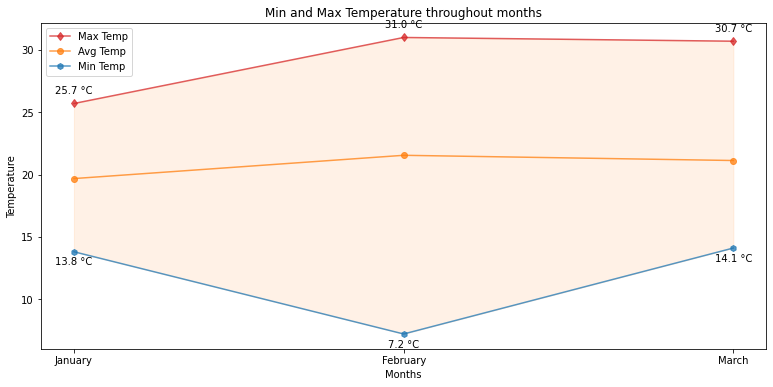

In [ ]:
#Plotting the min, max and average temperature values throughout the months following
#Setting the figsize
fig = plt.figure(figsize=(13,6))

# adding the fill, between min and max
plt.fill_between(temp.monthname, temp.maxtemp, temp.mintemp, alpha=0.10, color='tab:orange')

#Plotting values
plt.plot(temp.monthname, temp.maxtemp, label='Max Temp',alpha=0.75, color='tab:red',marker = 'd')
plt.plot(temp.monthname, temp.avgtemp, label ='Avg Temp', alpha = 0.75, color = 'tab:orange',marker ='o')
plt.plot(temp.monthname, temp.mintemp, label='Min Temp', alpha=0.75, color='tab:blue',marker = 'h')
plt.legend()

# zip joins x and y coordinates in pairs
for x,y in zip(temp.monthname,temp.maxtemp):
  label = "{:.1f} °C".format(y)
  plt.annotate(label, # this is the text
               (x,y), # this is the point to label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center
                
for x,y in zip(temp.monthname,temp.mintemp):
  label = "{:.1f} °C".format(y)
  plt.annotate(label, 
               (x,y),
                textcoords="offset points",
                xytext=(0,-13), 
                ha='center') 
plt.xlabel("Months")
plt.ylabel("Temperature")
plt.title("Min and Max Temperature throughout months");

From the above min,max and average graph of Temperature in the three months we can see that the temperature: 
* Stayed 20 degrees celcius which is normal in the Netherlands. 
* Additionally, the maximum temperature experienced was only 31 degrees in the month of February. 
* One interesting thing to mention here that the temperature in the month of February decreased to 7.2 degrees which corresponds perfectly well to the unexpected snow we experienced in the Netherlands this year. Thus, by using source we can conclude that the data is **indeed a realiable and read/actual data.**

## **Calculating Air Quality Index**

After having understood the relationship of different air paramaters <b>PM2.5,	TVOC,	CO2,	CO,	Ozone, and NO2</b> and the other parameters <b>Air Pressure,Temperature	and Relative Humidity</b>, we will now be calculating the *Air Quality Index* value by following the [tutorial](https://www.kaggle.com/rohanrao/calculating-aqi-air-quality-index-tutorial)

Important to note here, that while calculating the AQI, we will not be using CO, since with its constant value of 0 indicating no presence of burning of fossil fuels.

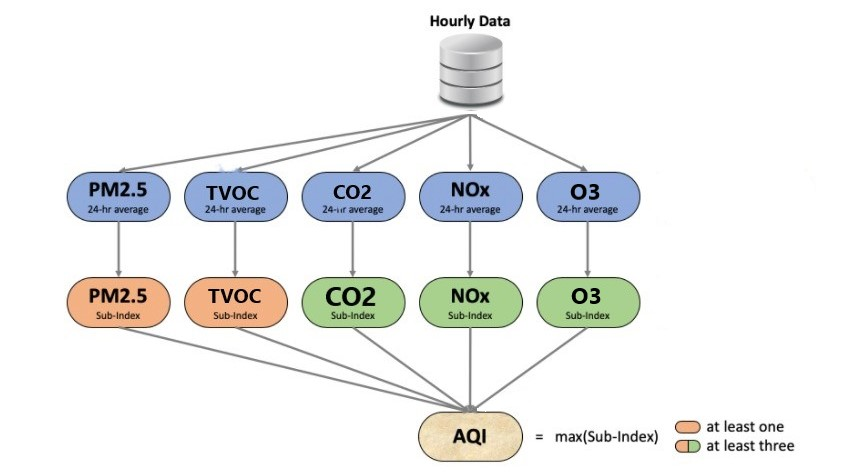



1. The AQI calculation uses 5 measures: <u>PM2.5, TVOC, NO2, CO2 and O3.</u>
2. For all key parameters the average value in last 24-hrs is used.
3. Each measure is converted into a Sub-Index based on pre-defined groups. Sometimes measures are not available due to lack of measuring or lack of required data points.
4. Final AQI is the maximum Sub-Index with the condition that <u>at least</u> one of PM2.5 and NO2 should be available and <u>at least three out of the five should be available.</u> The reason being, PM2.5 and NO2 were the variables who correlated highly/strongly positive with the target variable.




On an hourly basis, the concentration of each pollutant in the air is measured and converted into a number running from zero upwards by using a standard index or scale. The calculated number for every pollutant is termed as a sub-index. The highest sub-index for any given hour is recorded as the AQI for that hour.

### PM2.5 (Particulate Matter 2.5-micrometer)
PM2.5 is measure ug / m3 **Microgram per cubic meter of air**. The group are defiened in the function below:
    
    PM2.5 <= 30 mean **Good**
    PM2.5 30~60 mean **Satisfactory**
    PM2.5 60~90 mean **Unhealth**
    PM2.5 90~120 man **Poor**
    PM2.5 120~250 mean **Very Poor**
    PM2.5 >250 mean **Dangerous**

In [ ]:
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

result["PM2.5_SubIndex"] = result["PM2.5"].apply(lambda x: get_PM25_subindex(x))

### NOx (Notricx-Oxide)

NOx is measured in ppb ( Part Per Billion). Function Below to help us classified:
    
    NO <= 40 mean **Good**
    NO 40~80 mean **Satisfactory**
    NO 80~180 mean **Unhealth**
    NO 180~280 man **Poor**
    NO 280~400 mean **Very Poor**
    NO >400 mean **Dangerous*

In [ ]:
## NOx Sub-Index calculation

def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

result["NOx_SubIndex"] = result["NO2"].apply(lambda x: get_NOx_subindex(x))

### CO2 (Carbon Dioxide) 
CO2 is measure in mg / mr (** Milligram per cubic meter of air**). It define by this: 
    
    CO2 <= 700 mean **Good**
    CO2 700~800 mean **Satisfactory**
    CO2 800~1100 mean **Unhealth**
    CO2 1100~1500 man **Poor**
    CO2 1500~2000 mean **Very Poor**
    CO2 >2000 mean **Dangerous*

In [ ]:
## CO2 Sub-Index calculation
def get_CO2_subindex(x):
    if x <= 700:
        return x * 50 / 700
    elif x <= 800:
        return 50 + (x - 700) * 50 / 100
    elif x <= 1100:
        return 100 + (x - 800) * 100 / 300
    elif x <= 1500:
        return 200 + (x - 1100) * 100 / 400
    elif x <= 2000:
        return 300 + (x - 1500) * 100 / 500
    elif x > 2000:
        return 400 + (x - 2000) * 100 / 500
    else:
        return 0

result["CO2_SubIndex"] = result["CO2"].apply(lambda x: get_CO2_subindex(x))

### TVOC in ppm TVOC Index:

    TVOC <= 250 mean **Good**
    TVOC 250~500 mean **Satisfactory**
    TVOC 500~1000 mean **Unhealth**
    TVOC 1000~2500 man **Poor**
    TVOC 2500~3000 mean **Very Poor**
    TVOC >3000 mean **Dangerous*
    
Reference: https://www.renesas.com/eu/en/document/whp/overview-tvoc-and-indoor-air-quality?language=en

In [ ]:
def get_TVOCx_subindex(x):
    if x <= 250:
        return x * 50 / 250
    elif x <= 500:
        return 50 + (x - 250) * 50 / 250
    elif x <= 1000:
        return 100 + (x - 500) * 100 / 500
    elif x <= 2500:
        return 200 + (x - 1000) * 100 / 1500
    elif x <= 3000:
        return 300 + (x - 2500) * 100 / 500
    elif x > 3000:
        return 400 + (x - 3000) * 100 / 500
    else:
        return 0

result["TVOCx_SubIndex"] = result["TVOC"].apply(lambda x: get_TVOCx_subindex(x))

### Ozone Index

    Ozone <= 40 mean **Good**
    Ozone 40~80 mean **Satisfactory**
    Ozone 80~180 mean **Unhealth**
    Ozone 180~280 man **Poor**
    Ozone 280~400 mean **Very Poor**
    Ozone >400 mean **Dangerous*

In [ ]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

result["O3_SubIndex"] = result["Ozone"].apply(lambda x: get_O3_subindex(x))

**After having calculated the Sub-Index for each of the air parameter, lets compare if the method used is correct and corresponds to the Virus Index Category by using .head() on the result df.**

In [ ]:
result.head()

,Date and Time,Temperature,Relative Humidity,PM2.5,TVOC,CO2,CO,Air Pressure,Ozone,NO2,Virus Index,Hour,Weekday,Weekdayno,month,VirusIndexCat,PM2.5_SubIndex,NOx_SubIndex,CO2_SubIndex,TVOCx_SubIndex,O3_SubIndex
0,2021-01-22 11:33:00,17.8,61.2,4,0,1167,0,992.7,8.0,19.4,5,11,Friday,4,1,Mild,6.666667,24.25,216.75,0.0,8.0
1,2021-01-22 11:34:00,17.9,60.6,2,0,1159,0,992.6,8.0,19.4,5,11,Friday,4,1,Mild,3.333333,24.25,214.75,0.0,8.0
2,2021-01-22 11:35:00,17.9,61.0,2,0,1160,0,992.6,8.0,19.4,5,11,Friday,4,1,Mild,3.333333,24.25,215.00,0.0,8.0
3,2021-01-22 11:36:00,17.9,60.5,3,0,1161,0,992.6,8.0,19.4,5,11,Friday,4,1,Mild,5.000000,24.25,215.25,0.0,8.0
4,2021-01-22 11:37:00,18.0,59.7,2,0,1166,0,992.6,8.0,19.4,4,11,Friday,4,1,Mild,3.333333,24.25,216.50,0.0,8.0


In [ ]:
result['O3_SubIndex'].min()
result['O3_SubIndex'].min()

1.7

The final AQI is the maximum Sub-Index among the available sub-indices with the condition that at least one of PM2.5 and NO2 should be available and at least three out of the five should be available.

There is no theoretical upper value of AQI but its rare to find values over 1000.

The pre-defined buckets of AQI are as follows:

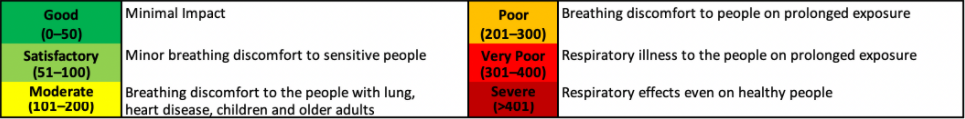

Finally, we define a function called <b>calculate_aqi_cat</b> which will be used to assign corresponding values to their sub category level by using mainly three parameters: the df, the row which contains the numerical aqi values and the colname in which the category level will be added.


In [ ]:
#Forming a function for calculating the aqi category
def calculate_aqi(df,rows,colname):
  cols = []
  for ind, row in df.iterrows():
    if  row[rows] <= 50 :
      cols.append("Good")
    elif row[rows] <= 100:
      cols.append("Satisfactory")
    elif row[rows] <= 200:
      cols.append("Moderate")
    elif row[rows] <= 300:
      cols.append('Poor')
    elif row[rows] <= 400:
      cols.append('Very Poor')
    else:
      cols.append("Severe")
  df[colname] = cols
  df.head()
  return df.head()

In [ ]:
result["Checks"] = (result["PM2.5_SubIndex"] > 0).astype(int) + \
                (result["NOx_SubIndex"] > 0).astype(int) + \
                (result["CO2_SubIndex"] > 0).astype(int) + \
                (result["O3_SubIndex"] > 0).astype(int) + \
                (result["TVOCx_SubIndex"] > 0).astype(int)


result["AQI_calculated"] = round(result[["PM2.5_SubIndex", "NOx_SubIndex","CO2_SubIndex", "O3_SubIndex", "TVOCx_SubIndex"]].max(axis = 1))

result.loc[result["PM2.5_SubIndex"] + result["NOx_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
result.loc[result.Checks < 3, "AQI_calculated"] = np.NaN

calculate_aqi(result, 'AQI_calculated','AQI_bucket_calculated')
#result["AQI_bucket_calculated"] = result["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
#result.head()
#df[~df.AQI_calculated.isna()].head(13)

,Date and Time,Temperature,Relative Humidity,PM2.5,TVOC,CO2,CO,Air Pressure,Ozone,NO2,Virus Index,Hour,Weekday,Weekdayno,month,VirusIndexCat,PM2.5_SubIndex,NOx_SubIndex,CO2_SubIndex,TVOCx_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,2021-01-22 11:33:00,17.8,61.2,4,0,1167,0,992.7,8.0,19.4,5,11,Friday,4,1,Mild,6.666667,24.25,216.75,0.0,8.0,4,217.0,Poor
1,2021-01-22 11:34:00,17.9,60.6,2,0,1159,0,992.6,8.0,19.4,5,11,Friday,4,1,Mild,3.333333,24.25,214.75,0.0,8.0,4,215.0,Poor
2,2021-01-22 11:35:00,17.9,61.0,2,0,1160,0,992.6,8.0,19.4,5,11,Friday,4,1,Mild,3.333333,24.25,215.00,0.0,8.0,4,215.0,Poor
3,2021-01-22 11:36:00,17.9,60.5,3,0,1161,0,992.6,8.0,19.4,5,11,Friday,4,1,Mild,5.000000,24.25,215.25,0.0,8.0,4,215.0,Poor
4,2021-01-22 11:37:00,18.0,59.7,2,0,1166,0,992.6,8.0,19.4,4,11,Friday,4,1,Mild,3.333333,24.25,216.50,0.0,8.0,4,216.0,Poor


From the above chunk, we can compare if the calculated values of *AQI_bucket_calculated* is correct or not. It can be seen that the VirusIndexCat for the first five instances is Mild, for which the AQI category is defined as Poor. Now, this proves the method used to calcuate AQI is infact correct as the second last category is defined for both of the calculated variables. Thus, we can proceed with this set of Air Quality Index.


Since, <b>result</b> dataframe contains the calculated Air Quality Index values and the corresponding buckets, lets check if the dataframe contains any null values for transparency of the data. 

In [ ]:
#checking how many null values are in final result column with air quality calculated
result.isnull().sum()
print("No NULL values, data is clean.")

No NULL values, data is clean.


In [ ]:
result.columns

Index(['Date and Time', 'Temperature', 'Relative Humidity', 'PM2.5', 'TVOC',
       'CO2', 'CO', 'Air Pressure', 'Ozone', 'NO2', 'Virus Index', 'Hour',
       'Weekday', 'Weekdayno', 'month', 'VirusIndexCat', 'PM2.5_SubIndex',
       'NOx_SubIndex', 'CO2_SubIndex', 'TVOCx_SubIndex', 'O3_SubIndex',
       'Checks', 'AQI_calculated', 'AQI_bucket_calculated'],
      dtype='object')

### Correlation Matrix of Variables with Air Quality Index
Getting access to the air quality index values per minute for each day in the first three months, and correlating the various numerical air parameter values by forming a correlation matrix.

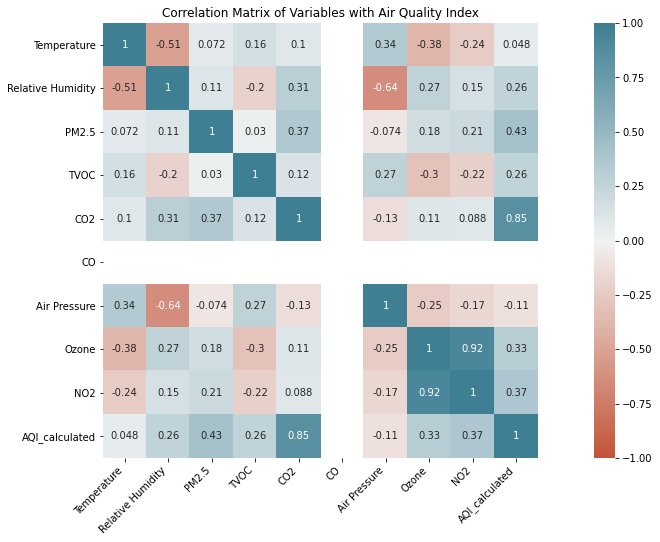

In [ ]:
#Correlation map
#Getting the correlation values
df_corr = result.corr()

#Dropping the non-numerical values
df_corr = df_corr.drop(['Virus Index','Hour','Weekdayno','month','NOx_SubIndex','PM2.5_SubIndex','CO2_SubIndex','TVOCx_SubIndex','O3_SubIndex','Checks'],axis = 1)
df_corr = df_corr.drop(['Virus Index','Hour','Weekdayno','month','NOx_SubIndex','PM2.5_SubIndex','CO2_SubIndex','TVOCx_SubIndex','O3_SubIndex','Checks'],axis = 0)

#Plotting the graph with specifying the figsize
plt.figure(figsize=(20,8))
ax = sns.heatmap( df_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
#Rotating the x labels to 45 degrees for better fitting
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title("Correlation Matrix of Variables with Air Quality Index");

**Variables relating  <font color='green'>positively</font> with Air Quality Index:**
1. CO2: 0.85
2. PM2.5: 0.43
3. NO2: 0.37

* As the value of *Air Quality Index* increases, the value of these three variables increases as well and vice versa. The relationship between these can be termed as strongly positive.

*  These variables can be agreed as all three of them are major air pollutants. Practically as more pollutants are present in the air, the more polluted it becomes and thus higher air quality index magnitude (falling more towards the higher sub category).


**Variables relating  <font color='red'>negatively</font>  with Air Quality Index:**
1. Air Pressure

* As the value of *Air Quality Index* increases, the value of *Air Pressure* decreases and vice versa. This relationship can be termed as weakly negative. Because the air pressure measure the pressure of the the air, it straightly affects whether pollution levels build up as well.

* During high pressure sytems, the air is usually still which allows pollution levels to build up but during low pressure systems the weather is often wet and windy, causing pollutants to be dispersed or washed out of the atmosphere by rain.

Out of above two categories we will be paying more attention the **Negatively **related variables as we want to decrease the value of air quality index so that it lies more in the *Good*, *Satisfactory* and *Moderate* subcategory levels.

In addition, we can see that the AQI bucket varies from 29 to 500 with an average AQI of 102, which indicates that the living room's air quality lies mostly <b>Moderate</b>.

In [ ]:
print(max(result.AQI_calculated))
print(min(result.AQI_calculated))
result["AQI_calculated"].mean()

500.0
29.0


102.65859698970972

Lets plot a gauge for displaying the range of the Air Quality Index with it's sub category. 

In [ ]:
#Plotting a gauge of the average air quality value with it's category in the living room.
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
     gauge = {
        'axis': {'range': [29, 500], 'tickwidth': 1, 'tickcolor': "darkblue"}, #setting range as the min and max AQI calculated
        'bar': {'color': "yellow"},
        'bgcolor': "white"},
    value = 102, #average air quality index 
    domain = {'x': [0.0, 0.9], 'y': [0.0, 0.9]},
    title = {'text': "AQI: Moderate"}))


fig.update_layout(
    paper_bgcolor="lightgray",
    height=300,  # Added parameter
    width= 900,
    title = "Average Air Quality Index of Living Room per Minute")

fig.show()


In addition, lets understand how each air quality metrics have been combined to calculate the air quality i.e. calculating each count's proportion. It can be clearly seen that categories <b> Good and Moderate </b> are the most proportioned categories involved in calculation.

In [ ]:
#Calculating the proportion of each AQI_bucked_calculated and storing it to prop variable.
prop = (result.groupby('AQI_bucket_calculated')['AQI_calculated'].count()
.reset_index(name="virus_count"))
prop['proportion'] = round((prop['virus_count']/sum(prop['virus_count']))*100,2)
prop

,AQI_bucket_calculated,virus_count,proportion
0,Good,49264,31.53
1,Moderate,58216,37.25
2,Poor,13484,8.63
3,Satisfactory,34339,21.97
4,Severe,3,0.00
5,Very Poor,958,0.61


In [ ]:
#Make one for after prediction
#Plotting the pie chart for each aqi categories proportion
fig = px.pie(prop, values='proportion', names='AQI_bucket_calculated', title='Current Air Quality Index Categories Proportion')

fig.update_layout(
    paper_bgcolor="lightgray",
    height=500,  # Added parameter
    width= 900,
    font = dict(size = 18))
fig.show()

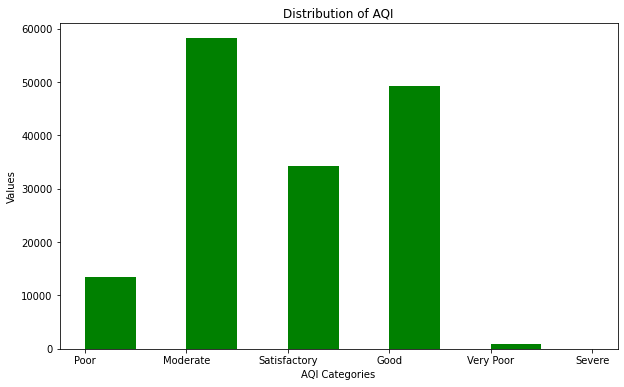

In [ ]:
#Plotting a bar graph for the same for different visualizations
plt.hist(result['AQI_bucket_calculated'], color ='green');
plt.title("Distribution of AQI")
plt.xlabel("AQI Categories")
plt.ylabel("Values");

In [ ]:
result['Date and Time'] = pd.to_datetime(result['Date and Time'])
#result['Date'] = result['Date and Time'].dt.date
#result['Time'] = result['Date and Time'].dt.strftime('%H:%M:%S')
#result.pop('Date and Time')
result.head()

,Date and Time,Temperature,Relative Humidity,PM2.5,TVOC,CO2,CO,Air Pressure,Ozone,NO2,Virus Index,Hour,Weekday,Weekdayno,month,VirusIndexCat,PM2.5_SubIndex,NOx_SubIndex,CO2_SubIndex,TVOCx_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,2021-01-22 11:33:00,17.8,61.2,4,0,1167,0,992.7,8.0,19.4,5,11,Friday,4,1,Mild,6.666667,24.25,216.75,0.0,8.0,4,217.0,Poor
1,2021-01-22 11:34:00,17.9,60.6,2,0,1159,0,992.6,8.0,19.4,5,11,Friday,4,1,Mild,3.333333,24.25,214.75,0.0,8.0,4,215.0,Poor
2,2021-01-22 11:35:00,17.9,61.0,2,0,1160,0,992.6,8.0,19.4,5,11,Friday,4,1,Mild,3.333333,24.25,215.00,0.0,8.0,4,215.0,Poor
3,2021-01-22 11:36:00,17.9,60.5,3,0,1161,0,992.6,8.0,19.4,5,11,Friday,4,1,Mild,5.000000,24.25,215.25,0.0,8.0,4,215.0,Poor
4,2021-01-22 11:37:00,18.0,59.7,2,0,1166,0,992.6,8.0,19.4,4,11,Friday,4,1,Mild,3.333333,24.25,216.50,0.0,8.0,4,216.0,Poor


For showing this data onto our software, we need to save the df into a json formatted file, so using the pandas available function .to_json() and setting orient as 'records' because our df contains some repeated values of date time.

In [ ]:
result.to_json(r'/content/drive/MyDrive/Colab Notebooks\df_to_json.json', orient='records')

Finally, we will be seeing how our air quality values calculated above are distributed with *date and time*, and *aqi_calculated* columns as x and y in the graph below. 

The insights which we can draw from here, is that most of the AQI values lie in the range of *good* to *moderate* range (100-300). There are only a few days mainly in January, when it reached close to 500 with severity, that could be seen or called up as an expection or an outlier. But as activities in the eco village do not stay stationary, therefore we will be considering these values in prediction as well.

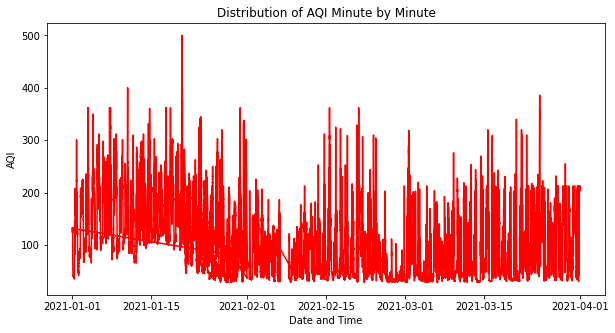

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(result['Date and Time'], result['AQI_calculated'], color = 'red')
plt.title("Distribution of AQI Minute by Minute")
plt.xlabel("Date and Time")
plt.ylabel("AQI");

# Data Prepocessing
We are going to be predicting <b>hourly</b> predictions, therefore preparing our dataset values for hourly. Since, our dataset consists minutebyminute values, hence taking the <b>average</b> air quality index magnitude per day/hour.

Date Values: January 1st to March 31st 


In [ ]:
AQIData = result.copy()
AQIData['Dates'] = AQIData['Date and Time'].dt.strftime('%y-%m-%d')
AQIData["hour"] = [x.hour for x in AQIData["Date and Time"]]
AQIData = AQIData[0::60]
AQIData = AQIData.groupby(['Dates', 'hour', 'AQI_bucket_calculated']).mean().reset_index()
AQIData.head()

,Dates,hour,AQI_bucket_calculated,Temperature,Relative Humidity,PM2.5,TVOC,CO2,CO,Air Pressure,Ozone,NO2,Virus Index,Hour,Weekdayno,month,PM2.5_SubIndex,NOx_SubIndex,CO2_SubIndex,TVOCx_SubIndex,O3_SubIndex,Checks,AQI_calculated
0,21-01-01,0,Moderate,19.7,44.3,13.0,49.0,845.0,0.0,1004.3,6.6,2.0,2.0,0.0,4.0,1.0,21.666667,2.500,115.000000,9.8,6.6,5.0,115.0
1,21-01-01,1,Good,19.2,45.4,14.0,30.0,694.0,0.0,1004.4,6.7,2.9,1.0,1.0,4.0,1.0,23.333333,3.625,49.571429,6.0,6.7,5.0,50.0
2,21-01-01,2,Good,18.9,46.1,4.0,16.0,629.0,0.0,1004.7,7.2,11.5,3.0,2.0,4.0,1.0,6.666667,14.375,44.928571,3.2,7.2,5.0,45.0
3,21-01-01,3,Good,18.6,46.4,9.0,18.0,577.0,0.0,1005.0,7.4,14.7,3.0,3.0,4.0,1.0,15.000000,18.375,41.214286,3.6,7.4,5.0,41.0
4,21-01-01,4,Good,18.6,46.1,8.0,15.0,543.0,0.0,1005.2,7.9,22.8,3.0,4.0,4.0,1.0,13.333333,28.500,38.785714,3.0,7.9,5.0,39.0


## Into 24 Hour 
The aim of the project is to predict values of Air Quality Index for 1 hour and 24 hours in the future. Since the provided sensor data is minute by minute, therefore to transform and yield the per hour result, we need to take the 60th because 1 hour = 60 minutes, for each day. 

In [ ]:
#df = result[['Date and Time','Hour','PM2.5','TVOC','CO2','CO','Ozone','NO2','AQI_calculated','AQI_bucket_calculated']]
df = result[['Date and Time','AQI_calculated','AQI_bucket_calculated','PM2.5','TVOC','CO2','CO','Ozone','NO2','Air Pressure','Temperature','Relative Humidity']]
# Extracting the hour of day
df['hour'] = [x.hour for x in df['Date and Time']]
df = df.groupby(['Date and Time']).mean().reset_index()
# slice [start:stop:step], starting from index 0 take every 60th record.
#df.pop('Hour')
df = df[0::60]
df.head(30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date and Time,AQI_calculated,PM2.5,TVOC,CO2,CO,Ozone,NO2,Air Pressure,Temperature,Relative Humidity,hour
0,2021-01-01 00:00:00,132.0,6.0,60.0,897.0,0.0,7.4,17.3,1004.1,20.5,41.1,0.0
60,2021-01-01 01:00:00,104.0,15.0,51.0,813.0,0.0,6.3,0.6,1004.3,19.6,44.6,1.0
120,2021-01-01 02:00:00,49.0,12.0,36.0,683.0,0.0,6.7,3.1,1004.4,19.1,45.5,2.0
180,2021-01-01 03:00:00,44.0,8.0,21.0,619.0,0.0,7.2,10.3,1004.8,18.8,46.2,3.0
240,2021-01-01 04:00:00,42.0,8.0,19.0,583.0,0.0,7.5,16.1,1005.0,18.6,46.3,4.0
300,2021-01-01 05:00:00,39.0,2.0,18.0,550.0,0.0,7.3,12.6,1005.2,18.5,46.2,5.0
360,2021-01-01 06:00:00,38.0,8.0,15.0,526.0,0.0,7.6,18.5,1005.3,18.3,46.1,6.0
420,2021-01-01 07:00:00,36.0,4.0,13.0,510.0,0.0,7.9,23.1,1005.5,18.2,45.8,7.0
480,2021-01-01 08:00:00,37.0,7.0,12.0,512.0,0.0,8.2,29.2,1006.1,18.1,45.6,8.0
540,2021-01-01 09:00:00,88.0,11.0,22.0,775.0,0.0,7.9,22.9,1006.5,18.3,46.5,9.0


The <b>df</b> dataset consists of the calculated Air Quality Index per hour for every day. Now, since we will be tackling per hour data, lets understand how the values of AQI is distributed and if it consists of any outliers by plotting a boxplot from the plotly library.

In [ ]:
fig = px.box(df, x="hour", y="AQI_calculated", title = "Boxplot Distribution of AQI per Hour")
fig.show()

From the above boxplot distribution, it can be infered that the points have been well laid out per hour. In other words, the Air Quality Index's variability is low and high statistical power. While some outliers can be accepted since we are working with weather/climatic data which can be very uncertain.

Now, lets plot these values of Air Quality Over the Hour to understand the distribution of data points.

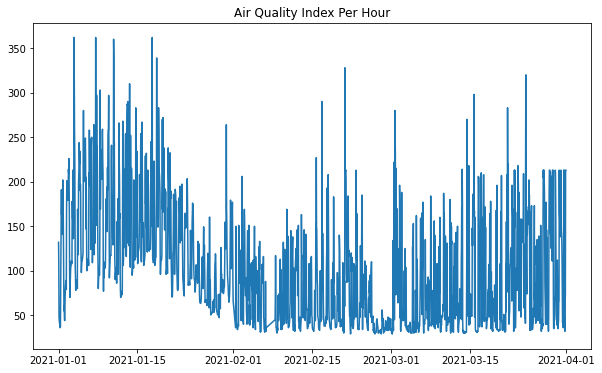

In [ ]:
plt.plot(df['Date and Time'], df['AQI_calculated'])
plt.title("Air Quality Index Per Hour");

In [ ]:
#Calculating the average AQI over hour
df["AQI_calculated"].mean()

102.1877777777778

It's interesting to notice here that the average AQI remains 102 in both conditions: per minute and per hour. This is a good indicator as the air quality continous to be in the *Moderate* level, therefore not causing any serious harm to the Boekel Eco village residents.

In [ ]:
#Plotting a gauge of the average air quality value with it's category in the living room.
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
     gauge = {
        'axis': {'range': [29, 500], 'tickwidth': 1, 'tickcolor': "darkblue"}, #setting range as the min and max AQI calculated
        'bar': {'color': "yellow"},
        'bgcolor': "white"},
    value = 102,
    domain = {'x': [0.0, 0.9], 'y': [0.0, 0.9]},
    title = {'text': "AQI: Moderate"}))


fig.update_layout(
    paper_bgcolor="lightgray",
    height=300,  # Added parameter
    width= 900,
    title = "Average Air Quality Index of Living Room per Hour")

fig.show()

# **Predicted Data**

In this section, we will be analysing the new forcasted data for the month of April and comparing how the values of Air Quality Index changed or experienced any trend. The predicted dataframe has been calculated by using the LSTM algorithm for each day at time 0:00 hours, therefore storing the last one month's values of air parameters with the hour in <b>dfpred</b>. This will be used as the prior data while visualizing.

In [ ]:
dfpred = df.copy()
#choosing the 0 hour from the last one month
dfpred = dfpred.loc[dfpred['hour'] == 0]
dfpred = dfpred.tail(n = 30)

#extracting the date from the date time column
dfpred['Date'] = dfpred['Date and Time'].dt.date
dfpred = dfpred.drop(['Date and Time', 'hour'], axis = 1)

#setting the Date column as the index for easy access
dfpred.set_index('Date')

,AQI_calculated,PM2.5,TVOC,CO2,CO,Ozone,NO2,Air Pressure,Temperature,Relative Humidity
Date,,,,,,,,,,
2021-03-02,101.0,1.0,504.0,600.0,0.0,3.6,0.4,1029.9,20.6,40.1
2021-03-03,48.0,10.0,200.0,667.0,0.0,3.0,0.1,1027.3,23.2,34.7
2021-03-04,33.0,4.0,43.0,458.0,0.0,6.0,0.6,1023.3,19.8,37.3
2021-03-05,30.0,1.0,0.0,419.0,0.0,5.5,0.3,1021.1,22.8,26.7
2021-03-06,37.0,2.0,168.0,513.0,0.0,6.3,7.5,1032.1,16.7,33.6
2021-03-07,46.0,1.0,73.0,465.0,0.0,7.6,36.9,1028.6,14.4,30.7
2021-03-08,184.0,3.0,919.0,663.0,0.0,5.7,0.9,1022.5,17.8,36.3
2021-03-09,41.0,4.0,176.0,569.0,0.0,5.8,0.7,1019.5,18.4,36.0
2021-03-10,49.0,1.0,189.0,682.0,0.0,3.8,0.7,1017.2,17.9,39.8


## Future Air Quality Index 

Now, importing the future data having the predicted values of Air Quality Index calculated by LSTM in the <b>lstmdf</b>. In addition, using parse_dates to indicate there's a date column and assigning it to the correct datetime data type. 

In [ ]:
#Importing the first january dataset naming it to df
lstmdf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lstm_dataframe_99%_AQI.csv',parse_dates=True)
lstmdf.columns = ['Date', 'Temperature','Relative Humidity','AQI_predicted']
lstmdf.drop(lstmdf.columns[[1,2]], axis = 1, inplace = True)
lstmdf['Date'] = pd.to_datetime(lstmdf['Date'])
lstmdf.head()

,Date,AQI_predicted
0,2021-03-31,206.67
1,2021-04-01,203.96
2,2021-04-02,201.72
3,2021-04-03,199.99
4,2021-04-04,198.36


In [ ]:
print(lstmdf.shape)
print("The lstmdf has Air Quality Index predicted for the next: ", lstmdf.shape[0], "days." )

(31, 2)
The lstmdf has Air Quality Index predicted for the next:  31 days.


Furthermore, checking the data types of the two variables and if there exists any null values.

In [ ]:
lstmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           31 non-null     datetime64[ns]
 1   AQI_predicted  31 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 624.0 bytes


Let's now again assign the values of AQI in the sub categories as did earlier for the current data and assigining it to the column <b>AQICat</b> respectively, we do this by calling the <b>calculate_aqi</b> function on our lstmdf. 

In [ ]:
calculate_aqi(lstmdf,'AQI_predicted','AQICat')

,Date,AQI_predicted,AQICat
0,2021-03-31,206.67,Poor
1,2021-04-01,203.96,Poor
2,2021-04-02,201.72,Poor
3,2021-04-03,199.99,Moderate
4,2021-04-04,198.36,Moderate


### Plotting Future AQI Values
Now that we have the category as well, lets now create a plot for better understanding of the future values and gaining information.

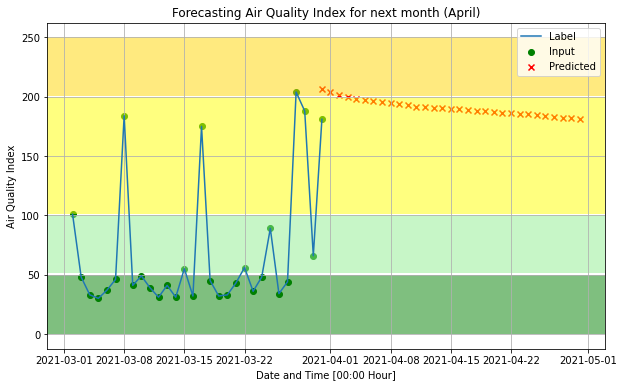

In [ ]:
fig, ax = plt.subplots()
plt.plot(dfpred['Date'], dfpred['AQI_calculated'], label = 'Label') #line graph joining the current values
plt.scatter(dfpred['Date'], dfpred['AQI_calculated'], label = 'Input', marker = 'o', color = 'green') #current values
plt.scatter(lstmdf['Date'],lstmdf['AQI_predicted'], label = 'Predicted', marker = 'x', color = 'red') #predicted values
plt.ylabel("Air Quality Index")
plt.xlabel("Date and Time [00:00 Hour]")
plt.title("Forecasting Air Quality Index for next month (April)")
plt.legend()
#showing the grid for seeing point wise data
ax.grid()
#assigining the values of aqi sub index with their colors from table mentioned above and writing it to x axis of the graph
ax.axhspan(0, 50, facecolor='green', alpha=0.5)
ax.axhspan(51, 100, facecolor='lightgreen', alpha=0.5)
ax.axhspan(101, 200, facecolor='yellow', alpha=0.5)
ax.axhspan(201, 250, facecolor='gold', alpha=0.5)
plt.show()

The plot above shows the forecasted air quality index for each of the 31 days in the month of April denoted by the red crosses. Furthermore, the graph has been divided into four colors each indicating the color of the sub category level. Our main focus lies in the area where most of the predicted values lie, i.e., the yellow: moderate aqi level. This concludes that the aqi remained mostly <b>Moderate</b> in the next month as well. 

## Future Key Air Parameters

Next, importing the data containing the predicted values of air parameters such as Temperature, Relative Humidity, PM2.5 and so on. These values have been calculated using the SVR (Support Vector Regressor) algorithm and have been stored in the <b>svmdf</b>.

In [ ]:
#Importing future air parameters variables into the notebook
svmdf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SVM_OtherIndex.CSV')

#Renaming the columns
svmdf.columns = ['Date','Temperature','Relative Humidity','PM2.5','TVOC','CO2','CO','Air Pressure','Ozone','NO2','AQI_calculated']

#Removing the previous AQI_calculated values
svmdf.pop('AQI_calculated')

#Assigning the date column to it's date time data type
svmdf['Date'] = pd.to_datetime(svmdf['Date'])
svmdf.head()

,Date,Temperature,Relative Humidity,PM2.5,TVOC,CO2,CO,Air Pressure,Ozone,NO2
0,2021-03-31,23.89,32.84,3.31,558.27,677.79,0.0,1017.90,3.31,0.52
1,2021-04-01,23.51,33.22,2.92,430.88,696.28,0.0,1017.78,3.17,0.52
2,2021-04-02,23.26,34.01,1.95,424.77,716.34,0.0,1017.68,3.01,0.54
3,2021-04-03,23.01,34.39,2.00,364.17,702.75,0.0,1017.66,2.98,0.57
4,2021-04-04,22.71,34.64,2.03,349.49,700.75,0.0,1017.75,3.11,0.55


In [ ]:
print(svmdf.shape)
print("The lstmdf has Air Quality Index predicted for the next: ", svmdf.shape[0], "days." )

(20, 10)
The lstmdf has Air Quality Index predicted for the next:  20 days.


### Plotting Future Air Parameters
Now that we have the current and the future values of important air parameters, lets plot them together for understanding the trend in them. We will be plotting each of the parameters separately with their inputs/current values with the predicted values in red crosses.

[]

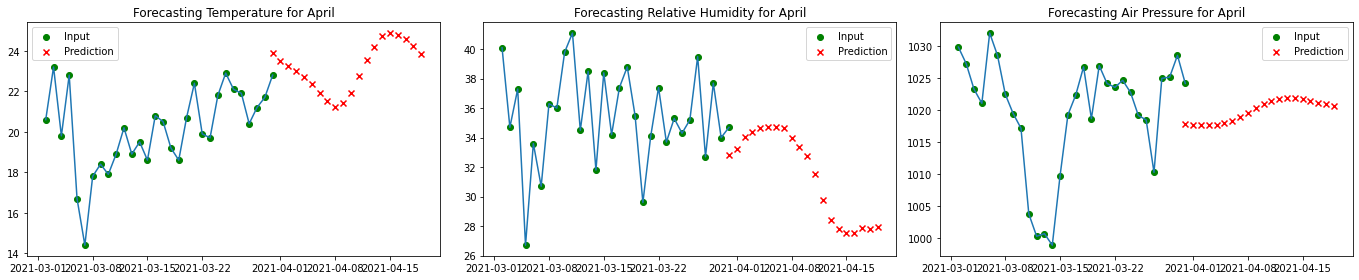

In [ ]:
fig, ((ax1,ax2,ax3)) = plt.subplots(1,3, figsize = (19,4))
#Temperature Graph
ax1.title.set_text("Forecasting Temperature for April") #title of the graph 1 (temperature)
ax1.plot(dfpred['Date'], dfpred['Temperature']) 
ax1.scatter(dfpred['Date'], dfpred['Temperature'], label = 'Input', marker = 'o', color = 'green') #input or current values
ax1.scatter(svmdf['Date'],svmdf['Temperature'], label = 'Prediction', marker = 'x', color = 'red') #future predicted values
ax1.legend()

#Relative Humidity Graph
ax2.title.set_text("Forecasting Relative Humidity for April")
ax2.plot(dfpred['Date'], dfpred['Relative Humidity'])
ax2.scatter(dfpred['Date'], dfpred['Relative Humidity'], label = 'Input', marker = 'o', color = 'green')
ax2.scatter(svmdf['Date'],svmdf['Relative Humidity'], label = 'Prediction', marker = 'x', color = 'red')
ax2.legend()

#Air Pressure
ax3.title.set_text("Forecasting Air Pressure for April")
ax3.plot(dfpred['Date'], dfpred['Air Pressure'])
ax3.scatter(dfpred['Date'], dfpred['Air Pressure'], label = 'Input', marker ='o', color = 'green')
ax3.scatter(svmdf['Date'],svmdf['Air Pressure'], label = 'Prediction', marker = 'x', color = 'red')
ax3.legend()

plt.tight_layout()
plt.plot()

Some key insights we gained from the predicted values are: 
1. The temperature experienced its own trend but remained in the range of 24 degrees, which was lower than the highest temperature in February. 
2. The optimal values of indoor relative humidity is between 30%-50%, when looked at our values, we see the humidity is going lower than 30% in time, this could be a reason for why our air quality stays <b>Moderate</b>.
3. The optimal value of air pressure for indoor houses is 1,013 and the future values somewhat stay in that range with a fluctuation between 1015-1020. 

These insights indicate that it is extremely necessary to provide sustainable suggestions to the residents of the eco village for improving the air they breathe.

[]

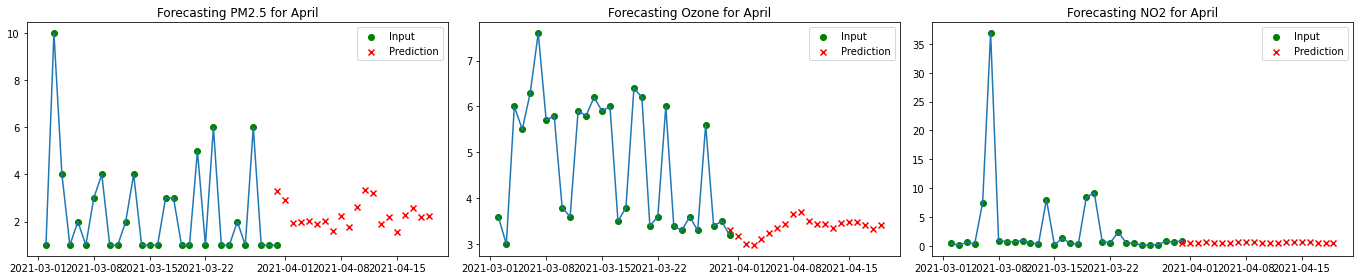

In [ ]:
fig, ((ax1,ax2,ax3)) = plt.subplots(1,3, figsize = (19,4))
#PM2.5 Forecasting
ax1.title.set_text("Forecasting PM2.5 for April")
ax1.plot(dfpred['Date'], dfpred['PM2.5'])
ax1.scatter(dfpred['Date'], dfpred['PM2.5'], label = 'Input', marker = 'o', color = 'green')
ax1.scatter(svmdf['Date'],svmdf['PM2.5'], label = 'Prediction', marker = 'x', color = 'red')
ax1.legend()

#Ozone Forecasting
ax2.title.set_text("Forecasting Ozone for April")
ax2.plot(dfpred['Date'], dfpred['Ozone'])
ax2.scatter(dfpred['Date'], dfpred['Ozone'], label = 'Input', marker = 'o', color = 'green')
ax2.scatter(svmdf['Date'],svmdf['Ozone'], label = 'Prediction', marker = 'x', color = 'red')
ax2.legend()

#NO2 Forecasting
ax3.title.set_text("Forecasting NO2 for April")
ax3.plot(dfpred['Date'], dfpred['NO2'])
ax3.scatter(dfpred['Date'], dfpred['NO2'], label = 'Input', marker ='o', color = 'green')
ax3.scatter(svmdf['Date'],svmdf['NO2'], label = 'Prediction', marker = 'x', color = 'red')
ax3.legend()

plt.tight_layout()
plt.plot()

Following the same technique, the current and the predicted values of PM2.5, Ozone and NO2 have been plotted. Some of the insights gained from these visualizations are:
1. The predicted values of PM2.5 lies in the range of 2-4. The 24-hour concentration of PM2.5 is considered unhealthy when it rises above 35.4 μg/m3. Thus, the values of PM2.5 isn't unhealthy. 
2. The values of Ozone for the month of April range between 3-4 mostly. Ozone levels of 5 ppm or higher are considered immediately dangerous to life or health. Thus, the levels of Ozone aren't harmful and are okay.
3. The forecasted values of NO2 experience a linear trend of being close to 0. This could mean that the their was no sign on burning of fossil fuels, smoking or any kind of fire related activity. But these values seem to be a bit vivid, therefore the model would be trained and tuned to investigate in yielding better or more more optimal results. 

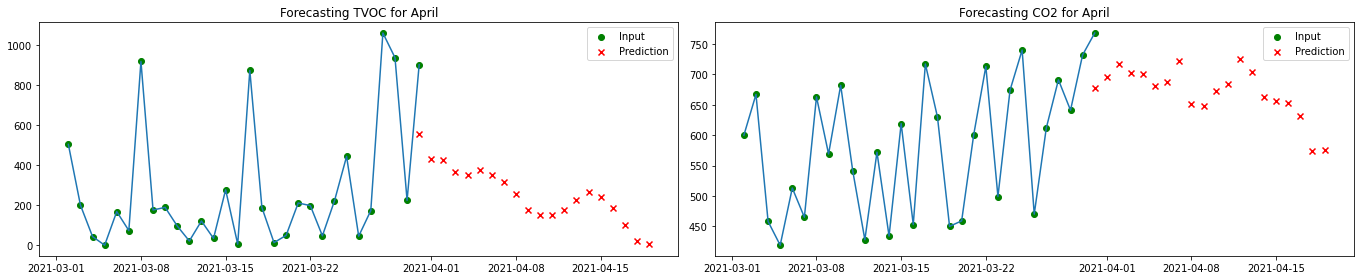

In [ ]:
fig, ((ax1,ax2)) = plt.subplots(1,2, figsize = (19,4))
#TVOC Forcasting
ax1.title.set_text("Forecasting TVOC for April")
ax1.plot(dfpred['Date'], dfpred['TVOC'])
ax1.scatter(dfpred['Date'], dfpred['TVOC'], label = 'Input', marker = 'o', color = 'green')
ax1.scatter(svmdf['Date'],svmdf['TVOC'], label = 'Prediction', marker = 'x', color = 'red')
ax1.legend()

#CO2 Forecasting
ax2.title.set_text("Forecasting CO2 for April")
ax2.plot(dfpred['Date'], dfpred['CO2'])
ax2.scatter(dfpred['Date'], dfpred['CO2'], label = 'Input', marker = 'o', color = 'green')
ax2.scatter(svmdf['Date'],svmdf['CO2'], label = 'Prediction', marker = 'x', color = 'red')
ax2.legend()

plt.tight_layout()
plt.show()

The above two plots indicate the future values of TVOC and CO2 and the insights gained from them are: 
1. The forecasted values of TVOC seem to be reducing in time. When researched, a maximum level of 120 ppb is usually recommended for the indoor environment to be considered healthy. The data points do seem to be reducing and coming closer to 120 ppb meaning, in the month of April, tvoc values are being substantiated to falling into the healthy index. 
2. An indoor CO2 level of 250-350 ppm: background (normal) outdoor air level
350-1,000 ppm: typical level found in occupied spaces with good air exchange according to this website: [here](https://ohsonline.com/Articles/2016/04/01/Carbon-Dioxide-Detection-and-Indoor-Air-Quality-Control.aspx?Page=2). Thus, the values of CO2 need to be improved a bit for ensuring purified air.


# Comparing Current Vs Future Values
To compare how the important variable change over time, we will be first looking at the current vs the predicted numerical value of air quality index by plotting the gauges of both side by side. In addition, the min and the maximum values of the gauge will be taken from the aqi column of both dataframes.

In [ ]:
#Plotting a gauge of the average air quality value with it's category in the living room.
trace1 = go.Indicator(
    mode = "gauge+number",
     gauge = {
        'axis': {'range': [result.AQI_calculated.min(), result.AQI_calculated.max()], 'tickwidth': 1, 'tickcolor': "darkblue"}, #setting range as the min and max AQI calculated
        'bar': {'color': "yellow"},
        'bgcolor': "white"},
    value = result.AQI_calculated.mean(),
    domain = {'x': [0.0, 0.4], 'y': [0.0, 1]},
    title = {'text': "AQI: Moderate"})

trace2 = go.Indicator(
    mode = "gauge+number",
     gauge = {
        'axis': {'range': [lstmdf.AQI_predicted.min(), lstmdf.AQI_predicted.max()], 'tickwidth': 1, 'tickcolor': "darkblue"}, #setting range as the min and max AQI calculated
        'bar': {'color': "yellow"},
        'bgcolor': "white"},
    value = lstmdf.AQI_predicted.mean(),
    domain = {'x': [0.6, 1.0], 'y': [0., 1.00]},
    title = {'text': "AQI: Moderate"})

# layout and figure production
layout = go.Layout(height = 300,
                   width = 600,
                   autosize = False,
                   title = 'Average Air Quality Index Current Vs Predicted')

fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

From the gauge made above, we can compare and conclude that the value of aqi in both the scenario stayed in the <b>Moderate</b> category with a increase in numerical value. But the increase in number also tells us that we need to take actions to make the air more healthy.

## Current Vs Future AQI Category Proportion

Next, we will be understand how actually yhe sub categories were distributed and used into calculating the final aqi value. To achieve this, we first go into the calculating the proportion as we will be needing it to plot our pie chart. These values have been stored in the <b>proppred</b> sub dataframe.

In [ ]:
#Calculating the proportion of each AQI_bucked_calculated and storing it to prop variable.
proppred = (lstmdf.groupby('AQICat')['AQI_predicted'].count()
.reset_index(name="AQI_count"))
#rounding it to .2 
proppred['proportion'] = round((proppred['AQI_count']/sum(proppred['AQI_count']))*100,2)
proppred

,AQICat,AQI_count,proportion
0,Moderate,28,90.32
1,Poor,3,9.68


In [ ]:
#Importing the subplot library from the plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#Classifying the number or subplots and their titles (1 row, 2 columns)
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],subplot_titles=['Predicted AQI', 'Current AQI'])

#Pie chart for the forecasted values(1 row, 1 column)
fig.add_trace(go.Pie(labels=proppred['AQICat'], values=proppred['proportion'], scalegroup='one'),1, 1)
#Pie chart for the current values
fig.add_trace(go.Pie(labels=prop['AQI_bucket_calculated'], values=prop['proportion'], scalegroup='one'),1, 2)

fig.update_layout(title_text='Forecasted Vs Actual Proportion of AQI Categories')
fig.show()

From the above pie chart distribution of the sub categories we can conclude two things:
1. The air quality stayed <b>Moderate</b> before and after the prediction, meaning that it didn't experience any high change (negative or positive), it stayed in the same sub category. 
2. Their is still some proportion of <b>Poor</b> being present in the month of April which indicates their were some activities in the eco village in which there was generation of smoke, fire or burning. 
3. The teams believes that these comparisons are a good starting point to allert the users and the residents of the eco village that they need to purify their air and houses.

Finally, we will be merging the two dataframes of prediction and plot the correlation matrix to compare how the values change in relationship with the Air Quality Index. 

In [ ]:
#Merging the two columns on the "Date" common column
pred_df = pd.merge(lstmdf, svmdf, left_on='Date', right_on='Date', how='right')
pred_df.head()

,Date,AQI_predicted,AQICat,Temperature,Relative Humidity,PM2.5,TVOC,CO2,CO,Air Pressure,Ozone,NO2
0,2021-03-31,206.67,Poor,23.89,32.84,3.31,558.27,677.79,0.0,1017.90,3.31,0.52
1,2021-04-01,203.96,Poor,23.51,33.22,2.92,430.88,696.28,0.0,1017.78,3.17,0.52
2,2021-04-02,201.72,Poor,23.26,34.01,1.95,424.77,716.34,0.0,1017.68,3.01,0.54
3,2021-04-03,199.99,Moderate,23.01,34.39,2.00,364.17,702.75,0.0,1017.66,2.98,0.57
4,2021-04-04,198.36,Moderate,22.71,34.64,2.03,349.49,700.75,0.0,1017.75,3.11,0.55


In [ ]:
print(pred_df.Ozone.min())
print(pred_df.Ozone.max())

2.98
3.7


In [ ]:
pred_df.to_csv(r'C:\Users\PC\my_new_file.csv\File Name.csv')

In [ ]:
pred_df.to_csv(r'C:\Users\PC\my_new_file.csv',index=False)

In [ ]:
print(pred_df.shape)
print("The", pred_df.shape[1], " unique air parameter and AQI values have been predicted for the next", pred_df.shape[0], "days.")

(20, 12)
The 12  unique air parameter and AQI values have been predicted for the next 20 days.


## Confusion Matrix of Predicted Variables

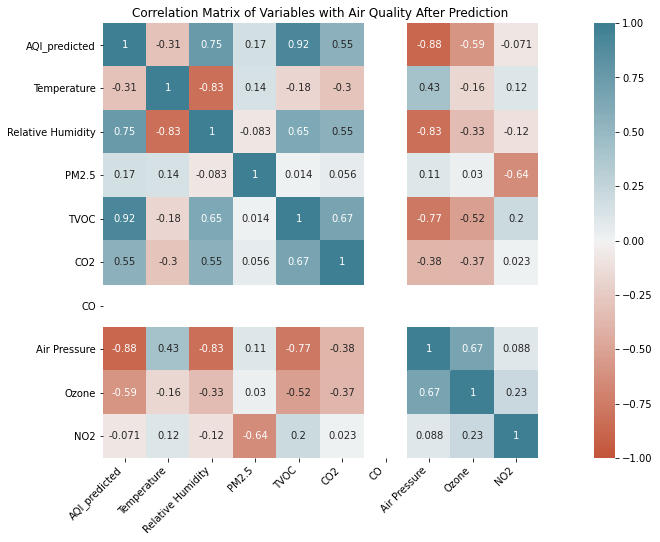

In [ ]:
#Correlation map
pred_df = pred_df.drop(['Date','AQICat'],axis = 1)
corr = pred_df.corr()
#corr = pred_df.drop(['Date','AQICat'],axis = 0)
#corr = pred_df.drop(['Date'],axis = 0)
plt.figure(figsize=(20,8))
ax = sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title("Correlation Matrix of Variables with Air Quality After Prediction");

From the confusion matrix of prediction plotted above, we can see which values related positively and negatively with our target variable AQI_predicted: 

<font color='green'>**Positively Correlated Variables**</font>
1. TVOC: 0.92
2. Relative Humidity: 0.75
3. CO2: 0.55

* Its interesting to notice the top three positively correlated values are two air pollutants and one air parameter. Relative Humidity increasing the value of air quality by 75% and vice versa, informing as the air indoors in the ecovillage becomes more humid especially in the coming summer months (June and July), air quality increases.

<font color='red'>**Negatively Correlated Variables**</font>
1. Air Pressure: -0.88
2. Ozone: -0.59
3. Temperature: -0.31

* Air Pressure remained negatively correlated with the air quality index even after the forecasting indicating the strong negative relationship with air quality index. Additionally, we have Ozone and Temperature variables as well both contributing towards decreasing the value of AQI. These are the values we should be giving importance to while trying to redue AQI magnitude.

# Conclusion
From the analysis conducted in depth for before and after the prediction of key air parameters and our final target Air Quality Index, we can conclude how they have changed throughout in the EcoVillage Boekel. It was seen that the AQI stayed fairly *Moderate*, before and after prediction meaning that their wasn't much change in the values expect in the numerical magnitude. This gives us a great chance to rely on this real data to inform the residents of Eco Village that the quality of the Air that they breathe isn't perfect but can definitely be imporved by undertaking sustainable suggestions. We believe that this dataset was a perfect source given by our client for improving the air quality in EcoVillage Boekel. We strongly hope that this data values can act as a source of aid, in improving air in real life. 